In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/song9063/Wiset2025Examples/refs/heads/main/datasets/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


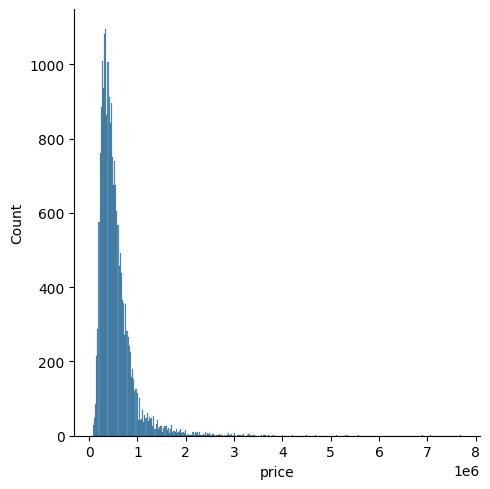

In [5]:
sns.displot(df['price'])

In [7]:
df.corr(numeric_only=True)['price'].sort_values()

,price
zipcode,-0.053402
id,-0.016772
long,0.022036
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.126424
floors,0.256804
waterfront,0.266398


<Axes: xlabel='price', ylabel='sqft_living'>

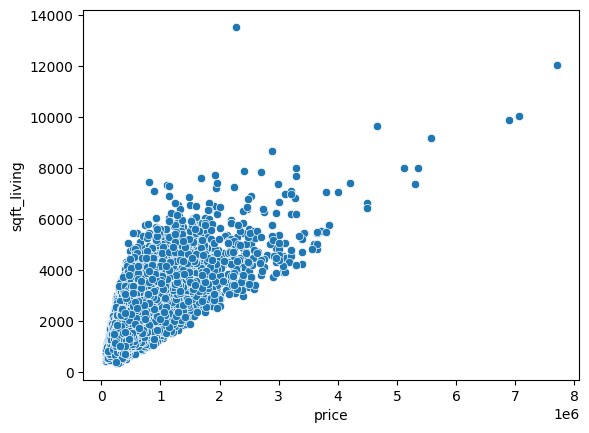

In [9]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

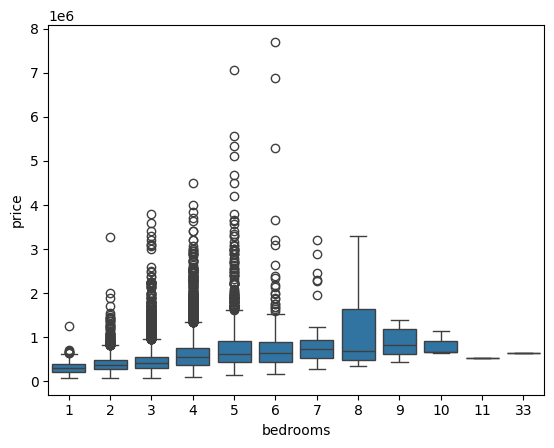

In [10]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='price', ylabel='long'>

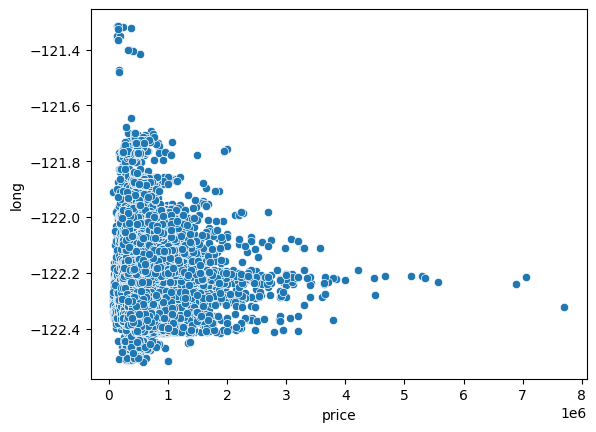

In [11]:
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

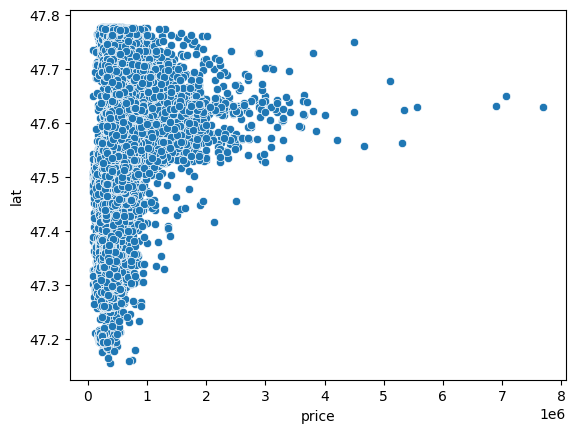

In [12]:
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

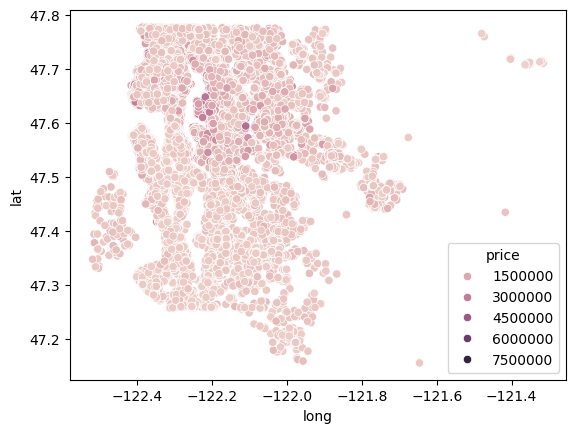

In [13]:
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [15]:
df.sort_values('price', ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [17]:
len(df)*0.01

215.97

In [18]:
df_no_1 = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

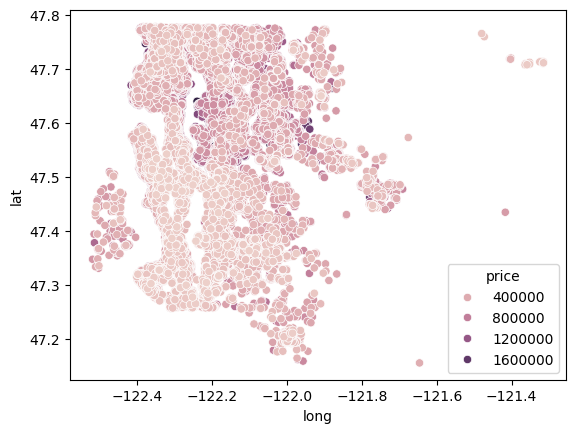

In [19]:
sns.scatterplot(x='long', y='lat', data=df_no_1, hue='price')

In [ ]:
df.columns

# 날릴 특성들
# id,

df = df.drop(columns=['id'], axis=1)

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [36]:
df = df.drop('date', axis=1)

In [ ]:
df = df.drop('zipcode', axis=1)

In [39]:
X = df.drop('price', axis=1)
y = df['price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1235
)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()

# Input layer
model.add(Dense(19, activation='relu'))

# Hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# Output layer
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [51]:
model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128, # 2의 배수
    epochs=400
)

Epoch 1/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 436908261376.0000 - val_loss: 439367598080.0000
Epoch 2/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 412791177216.0000 - val_loss: 432829923328.0000
Epoch 3/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 409370165248.0000 - val_loss: 373858926592.0000
Epoch 4/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 310593880064.0000 - val_loss: 204411092992.0000
Epoch 5/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 154726531072.0000 - val_loss: 106673954816.0000
Epoch 6/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 101550366720.0000 - val_loss: 101782716416.0000
Epoch 7/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95263506432.0000 - val_loss: 99871285248.0000
Epoch 8/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95117443072.0000 - val_loss: 97966571520.0000
Epoch 9/400
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95517638656.0000 - val_loss: 95902597120.0000
Epoch 10/400
135/135 ━━━━

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

<Axes: >

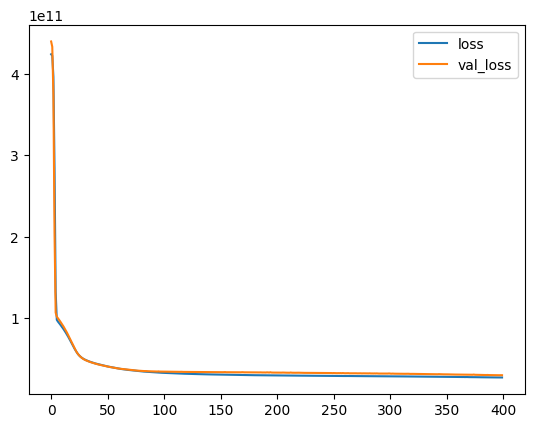

In [54]:
losses.plot()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
preds = model.predict(X_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
preds

array([[430867.16],
       [800194.7 ],
       [461679.72],
       ...,
       [383045.9 ],
       [280478.22],
       [396180.84]], dtype=float32)

In [58]:
mean_squared_error(y_test, preds)

29888356178.672665

In [59]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(172882.4924006843)

In [60]:
mean_absolute_error(y_test, preds)

104950.22119502314

In [61]:
df['price'].describe()

,price
count,2.159700e+04
mean,5.402966e+05
std,3.673681e+05
min,7.800000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [62]:
from sklearn.metrics import explained_variance_score

In [63]:
explained_variance_score(y_test, preds)

0.788351701108321

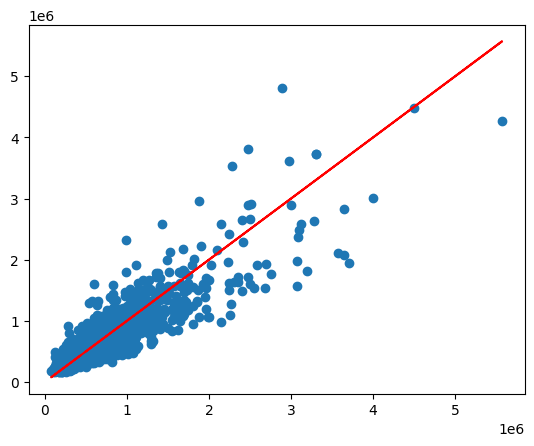

In [65]:
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, color='red')

In [ ]:
house1 = df.drop('price', axis=1).iloc[0]
house1

In [69]:
house1.values.shape

(19,)

In [70]:
house1 = house1.values.reshape(-1, 19)

In [71]:
house1 = scaler.transform(house1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [72]:
model.predict(house1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


array([[284610.7]], dtype=float32)

In [73]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
